<a href="https://colab.research.google.com/github/NancyBudgujjar/Machine-Learning/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/project/titanic/train.csv')
df.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.head() # used to see the first five elements of the data.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum() # to get count of null values in dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.mean()

<ipython-input-6-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [7]:
# in place of null value writing mean of 'Age'
df['Age'] = df['Age'].fillna(29.699) 

In [8]:
df.isnull().sum() # to get count of null values in dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.drop(columns=['PassengerId','Cabin','Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'],axis=0)
#dropping column which have comparatively low significance

,Survived,Pclass,Sex,Age
0,0,3,male,22.000
1,1,1,female,38.000
2,1,3,female,26.000
3,1,1,female,35.000
4,0,3,male,35.000
...,...,...,...,...
886,0,2,male,27.000
887,1,1,female,19.000
888,0,3,female,29.699
889,1,1,male,26.000


In [10]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Age', ylabel='Survived'>

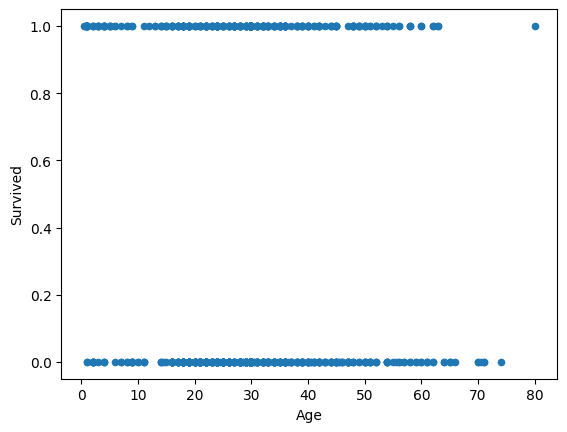

In [12]:
#Plot scatter plot.
df.plot(x = 'Age', y = 'Survived', kind = 'scatter')

<Axes: xlabel='Survived', ylabel='Sex'>

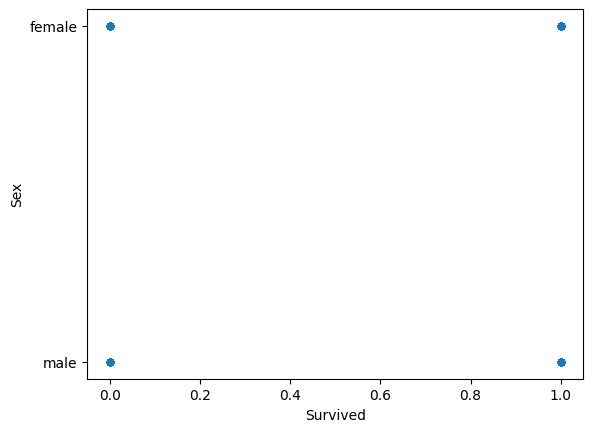

In [26]:
df.plot(x = 'Survived', y = 'Sex', kind = 'scatter')

In [14]:
# Train test split
train = df.sample(frac = 0.7, random_state = 1)
test = df.drop(train.index)

In [38]:
y_train = train["Survived"]
x_train = train.drop("Survived", axis = 1)

In [39]:
y_test = test["Survived"]
x_test = test.drop("Survived", axis = 1)

In [29]:
means = train.groupby(["Survived"]).mean() # Estimate mean of each class, feature
var = train.groupby(["Survived"]).var() # Estimate variance of each class, feature
prior = (train.groupby("Survived").count() / len(train)).iloc[:,1] # Estimate prior probabilities
classes = np.unique(train["Survived"].tolist()) # Storing all possible classes

<ipython-input-29-c8b24d915f5d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = train.groupby(["Survived"]).mean() # Estimate mean of each class, feature
<ipython-input-29-c8b24d915f5d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  var = train.groupby(["Survived"]).var() # Estimate variance of each class, feature


In [30]:
def Normal(n, mu, var):
    
    # Function to return pdf of Normal(mu, var) evaluated at x
    sd = np.sqrt(var)
    pdf = (np.e ** (-0.5 * ((n - mu)/sd) ** 2)) / (sd * np.sqrt(2 * np.pi))
    
    return pdf

In [31]:
def Predict(X):
    Predictions = []
    
    for i in X.index: # Loop through each instances
        ClassLikelihood = []
        instance = X.loc [i]
        
        for cls in classes: # Loop through each class
            FeatureLikelihoods = []
            FeatureLikelihoods.append(np.log(prior[cls])) # Append log prior of class 'cls'
            
            for col in x_train.columns: # Loop through each feature
                data = instance[col]
                
                mean = means[col].loc[cls] # Find the mean of column 'col' that are in class 'cls'
                variance = var[col].loc[cls] # Find the variance of column 'col' that are in class 'cls'
                
                Likelihood = Normal(data, mean, variance)
                
                if Likelihood != 0:
                    Likelihood = np.log(Likelihood) # Find the log-likelihood evaluated at x
                else:
                  Likelihood = 1/len(train) 
                
                FeatureLikelihoods.append(Likelihood)
                
            TotalLikelihood = sum(FeatureLikelihoods) # Calculate posterior
            ClassLikelihood.append(TotalLikelihood)
            
        MaxIndex = ClassLikelihood.index(max(ClassLikelihood)) # Find largest posterior position
        Prediction = classes[MaxIndex]
        Predictions.append(Prediction)
        
    return Predictions

In [32]:
def Accuracy(y, prediction):
    
    # Function to calculate accuracy
    y = list(y)
    prediction = list(prediction)
    score = 0
    
    for i, j in zip(y, prediction):
        if i == j:
            score += 1
            
    return score / len(y)

In [ ]:
PredictTrain = Predict(x_train)
PredictTest = Predict(x_test)

In [35]:
print(round(Accuracy(y_train, PredictTrain), 5))
print(round(Accuracy(y_test, PredictTest), 5))

NameError: ignored